In [2]:
# Digit Recognizer
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Separate features and labels
X = train_data.drop('label', axis=1)
y = train_data['label']

# Print the shape of the data
print(f"Training data shape: {X.shape}")
print(f"Testing data shape: {test_data.shape}")


Training data shape: (42000, 784)
Testing data shape: (28000, 784)


In [3]:

# Normalize the pixel values (scale from 0-255 to 0-1)
X = X / 255.0
test_data = test_data / 255.0

# Reshape the data for CNN input (28x28 images)
X = X.values.reshape(-1, 28, 28, 1)
test_data = test_data.values.reshape(-1, 28, 28, 1)

# Print the shape of the reshaped data
print(f"Reshaped training data shape: {X.shape}")
print(f"Reshaped testing data shape: {test_data.shape}")

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Reshaped training data shape: (42000, 28, 28, 1)
Reshaped testing data shape: (28000, 28, 28, 1)


In [5]:
# Create a simple CNN model
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)


Training with epochs=5, batch_size=32
Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9927 - loss: 0.0200 - val_accuracy: 0.9867 - val_loss: 0.0492
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9963 - loss: 0.0112 - val_accuracy: 0.9882 - val_loss: 0.0399
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9977 - loss: 0.0067 - val_accuracy: 0.9882 - val_loss: 0.0479
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9967 - loss: 0.0098 - val_accuracy: 0.9854 - val_loss: 0.0651
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9948 - loss: 0.0146 - val_accuracy: 0.9914 - val_loss: 0.0351

Training with epochs=5, batch_size=64
Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9993 - loss: 0.0019 - val_accuracy: 0.9908 - val_loss: 0.0358
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 1.0000 - loss: 4.0550e-04 - val_accuracy: 0.9914 - val_loss: 0.0360
Epoch 3/5
525/

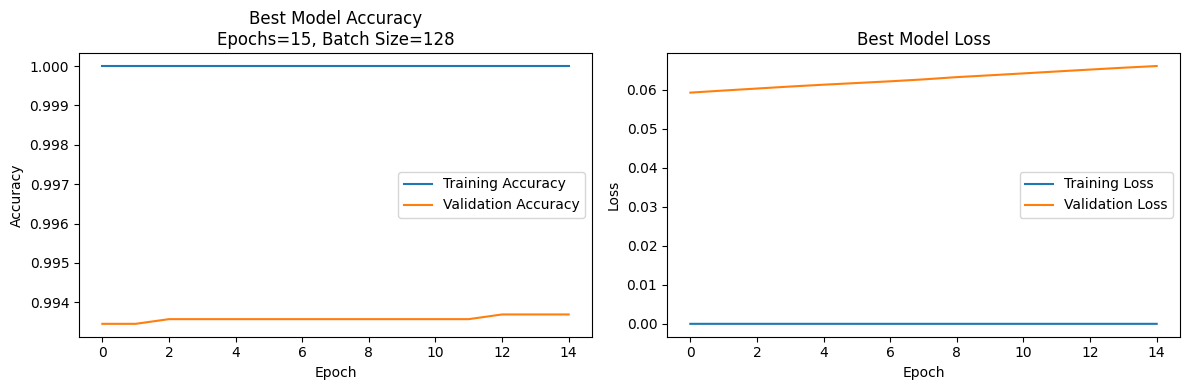

In [9]:
# Define hyperparameter combinations to try
epochs_list = [5, 10, 15]
batch_sizes = [32, 64, 128]

# Store results
results = []

# Try different combinations
for epochs in epochs_list:
    for batch_size in batch_sizes:
        print(f"\nTraining with epochs={epochs}, batch_size={batch_size}")
        
        # Train the model
        history = model.fit(X_train, y_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_data=(X_val, y_val),
                          verbose=1)
        
        # Get the best validation accuracy
        best_val_acc = max(history.history['val_accuracy'])
        results.append({
            'epochs': epochs,
            'batch_size': batch_size,
            'val_accuracy': best_val_acc,
            'history': history.history
        })

# Find best parameters
best_result = max(results, key=lambda x: x['val_accuracy'])
print(f"\nBest parameters:")
print(f"Epochs: {best_result['epochs']}")
print(f"Batch size: {best_result['batch_size']}")
print(f"Validation accuracy: {best_result['val_accuracy']:.4f}")

# Plot training history for best model
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(best_result['history']['accuracy'], label='Training Accuracy')
plt.plot(best_result['history']['val_accuracy'], label='Validation Accuracy')
plt.title(f'Best Model Accuracy\nEpochs={best_result["epochs"]}, Batch Size={best_result["batch_size"]}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(best_result['history']['loss'], label='Training Loss')
plt.plot(best_result['history']['val_loss'], label='Validation Loss')
plt.title('Best Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
# Make predictions on test data
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# Create submission DataFrame
submission = pd.DataFrame({
    'ImageId': range(1, len(predicted_classes) + 1),
    'Label': predicted_classes
})

# Save submission file
submission.to_csv('submission.csv', index=False)

# Print first few predictions
print("\nFirst few predictions:")
print(submission.head())

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

First few predictions:
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3
